# K-Means

In [1]:
##import os
##os.environ['OMP_NUM_THREADS] = '1'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = dataset.iloc[:,:].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화

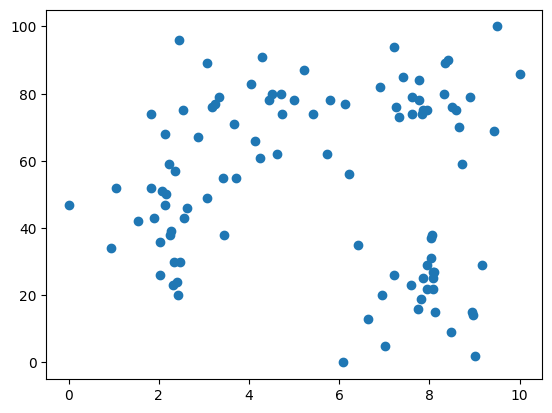

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

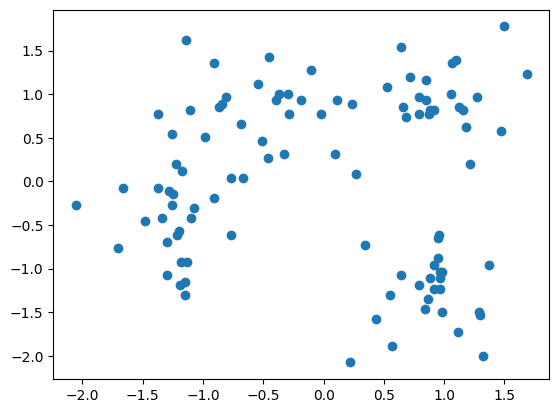

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show()

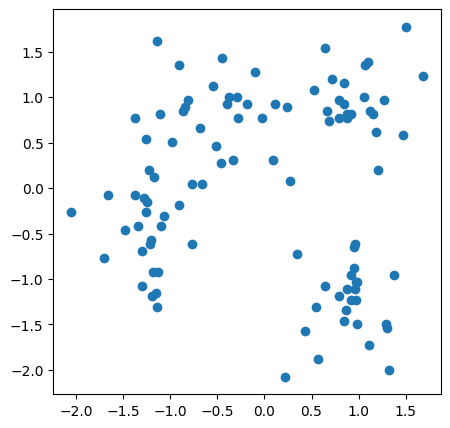

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1])
plt.show()

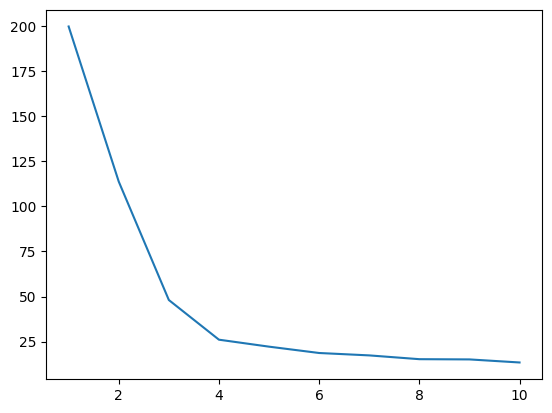

In [9]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,11), inertia_list)
plt.show()

In [10]:
K = 4

In [11]:
kmeans = KMeans(n_clusters=K, random_state=0)
y_kmeans=kmeans.fit_predict(X)


In [12]:
y_kmeans

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32)

In [13]:
centers = kmeans.cluster_centers_
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

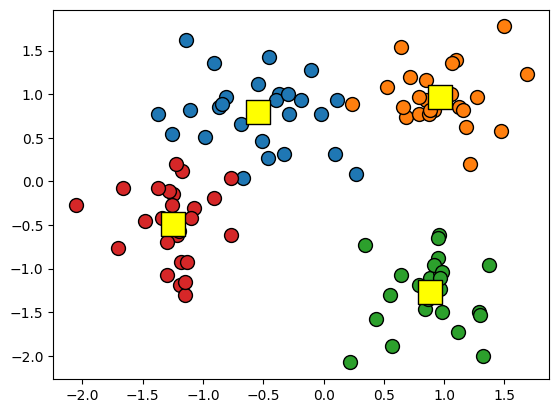

In [14]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster,0], X[y_kmeans==cluster,1],s=100, edgecolor='black')
    plt.scatter(centers[cluster, 0],centers[cluster,1],s = 300, edgecolor='black', color ='yellow', marker='s')
plt.show()

In [15]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

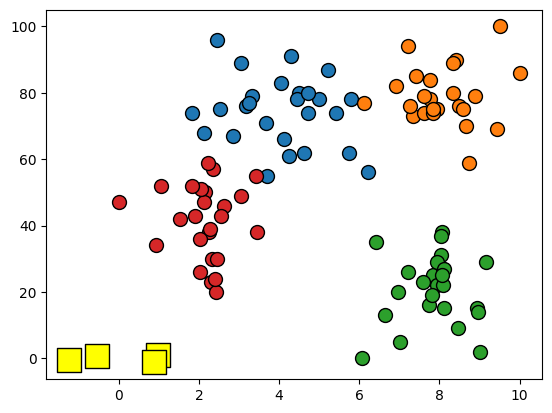

In [16]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster,0], X_org[y_kmeans==cluster,1],s=100, edgecolor='black')
    plt.scatter(centers[cluster, 0],centers[cluster,1],s = 300, edgecolor='black', color ='yellow', marker='s')
plt.show()

In [17]:
centers_org=sc.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

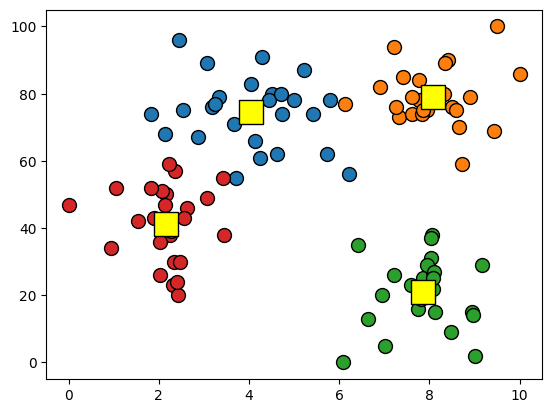

In [18]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster,0], X_org[y_kmeans==cluster,1],s=100, edgecolor='black')
    plt.scatter(centers_org[cluster, 0],centers_org[cluster,1],s = 300, edgecolor='black', color ='yellow', marker='s')
plt.show()